In [16]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import requests

In [17]:
url = 'https://www.alphavantage.co/query?function=FX_MONTHLY&from_symbol=USD&to_symbol=PKR&apikey=WYXNGVUVCHVMD6W1'
r = requests.get(url)
data = r.json()
if "Time Series FX (Monthly)" in data:
    fx_data = data["Time Series FX (Monthly)"]
    
    # Convert the JSON data to a pandas DataFrame
    df = pd.DataFrame(fx_data).T
df.columns = ['Open','High','Low','Close']


In [18]:
df = df.apply(pd.to_numeric)
df['Open']
df.index = pd.to_datetime(df.index)


### Data summary / data set

this is data about forex exchange that i have fetch using api from website free stock api
frm which specificaly i fetch 4 columns based on my need 
and yes this forex change contain data of usd and pkr means from usd to pkr 
of previous 1 month
and the data contain 120 rows with 4 columns
#### Columns discription

- `Data`: contain data 
- `Open`: that contain the starting rate of usd 
- `High`L the highest rate of usd in that very day
- `Low`: the lowest rate of usd
- `Closed`: this column contain on which usd stop at that particular day

#### Messy Data:
#### Dirty Data

Now iam going to start Data Analysis for my Data before apply Ml algorithm


In [19]:
# start with data time colums
df.index
# i was cheching that my index is in appropriate data type or not means in data time but yes it is 


DatetimeIndex(['2024-10-11', '2024-09-30', '2024-08-29', '2024-07-31',
               '2024-06-30', '2024-05-30', '2024-04-30', '2024-03-31',
               '2024-02-29', '2024-01-31',
               ...
               '2015-08-31', '2015-07-30', '2015-06-30', '2015-05-31',
               '2015-04-30', '2015-03-31', '2015-02-26', '2015-01-29',
               '2014-12-31', '2014-11-30'],
              dtype='datetime64[ns]', length=120, freq=None)

<Axes: xlabel='Open', ylabel='Count'>

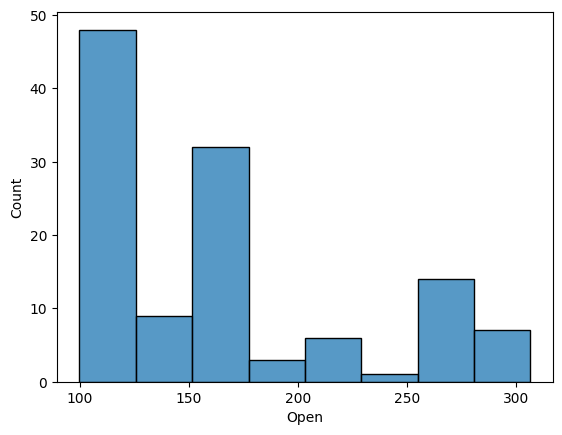

In [20]:
# for open data set
sns.histplot(df['Open'])

<Axes: xlabel='Low', ylabel='Count'>

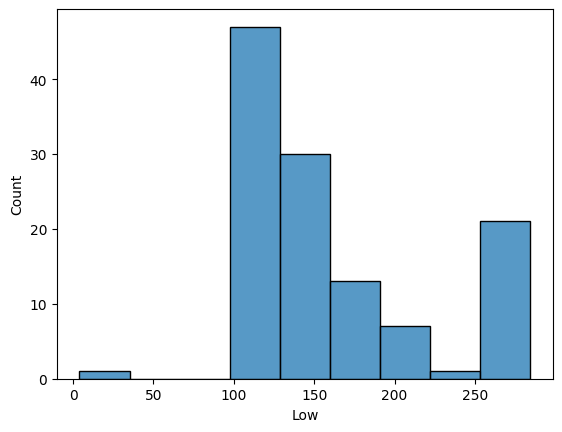

In [21]:
sns.histplot(df['Low'])

,Open,High,Low,Close
2024-10-11,276.70346,277.89800,275.77716,277.58010
2024-09-30,277.69434,278.50000,274.74445,277.50000
2024-08-29,276.98282,278.54999,274.65088,278.14999
2024-07-31,277.15756,278.54999,276.02249,278.54999
2024-06-30,276.64551,280.10071,275.50232,276.54779
2024-05-30,275.79242,278.25000,275.01947,278.14999
2024-04-30,276.33597,279.58670,274.75617,278.00000
2024-03-31,277.22272,279.05646,274.40979,276.10202
2024-02-29,275.44013,279.48477,274.64386,278.79999
2024-01-31,277.12357,281.50000,274.21771,279.12000


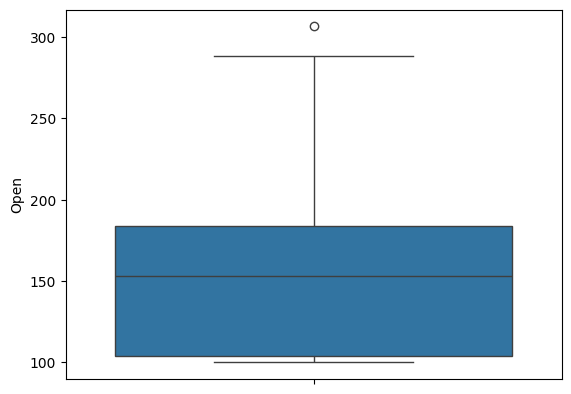

In [22]:
# now plot soe other graph to understand the data more closely and deeply

sns.boxplot(df['Open'])
# show one outlier lets check is that outlier 

df[df['Open'] >= 250]

# now is not outlier actually may on this the Usd rate reached to 306 

# Pakistan hai koch bhee ho sakhta hai ehehehe



<Axes: ylabel='Low'>

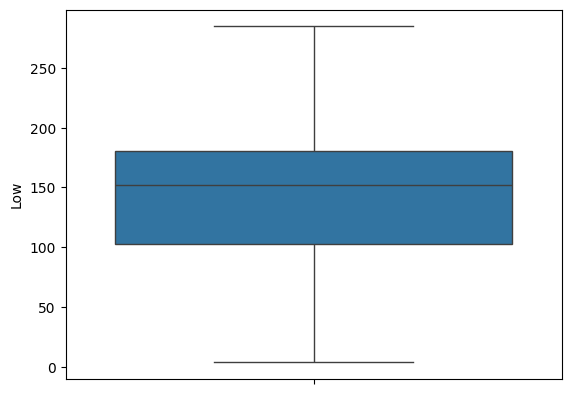

In [23]:
sns.boxplot(df['Low'])

# Thank GOD no outlier Present here

In [24]:
# Now the last step is to Check for Feature Engineering if Require 
# I think no need ....abs
sns.scatterplot(df,df['Open'],df['Close'])

TypeError: scatterplot() takes from 0 to 1 positional arguments but 3 were given

Finally we should start with Machine Learning 


- My input Column will be Open,High,Low
- nd my Target column will be ---> Closed that is the final rate of USD in PKR


Lets Start

In [10]:
# I will first split my data into x and y

X = df.iloc[:,1:]
Y = df.iloc[:,-1]


In [11]:
# Now start splitting data into Train and Test for that i will import 

from sklearn.model_selection import train_test_split

X_test,X_train,Y_test,Y_train = train_test_split(X,Y,test_size=0.2,random_state=20)


In [12]:
# now Training my model on train data

from sklearn.linear_model import LinearRegression

# creating obj of Linear class
lr = LinearRegression()

# Now pass train x,y in fir model so that my model trained

lr.fit(X_train,Y_train)

# my model been trained 
# now test on my test data



LinearRegression()

In [13]:
data = np.array([300,160,220]).reshape(1,-1)
Y_pred = lr.predict(data)

# Now check for efficeincy 

from sklearn.metrics import r2_score

r2_score(Y_predict,Y_test)

c:\Users\Qur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


NameError: name 'Y_predict' is not defined

In [61]:
# Oh wowww my model show efficiency of 1.0 



2016-01-31    104.22000
2020-11-30    159.00000
2023-10-31    280.70001
2024-10-11    277.55100
2021-07-29    160.92839
                ...    
2022-06-30    202.46780
2016-11-30    104.70000
2023-07-31    286.39999
2017-04-30    103.69000
2016-07-31    102.80000
Name: Close, Length: 96, dtype: float64

In [82]:
X_test['Hight']

,High,Low,Close
2016-01-31,104.80000,102.75000,104.22000
2020-11-30,160.64999,156.20073,159.00000
2023-10-31,288.48593,273.93805,280.70001
2024-10-11,277.89800,275.77716,277.55100
2021-07-29,162.10001,155.62085,160.92839
...,...,...,...
2022-06-30,211.51150,194.89329,202.46780
2016-11-30,104.78000,102.68000,104.70000
2023-07-31,289.06457,269.58597,286.39999
2017-04-30,104.83000,101.70000,103.69000


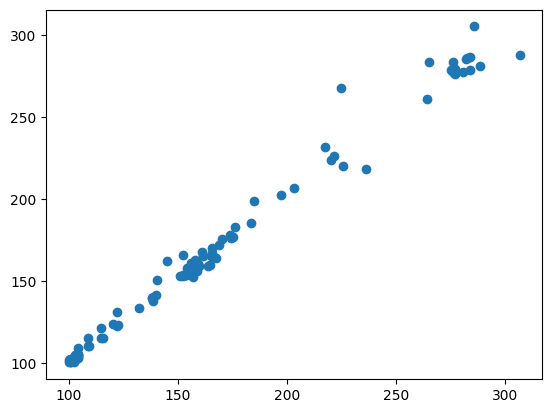

In [31]:
plt.scatter(df['Open'],df['Close'])